Author: Thomas Baratta

Date: 02/11/2024

EagleX Task => Finding hit rates of gold_std images

Objective: Find the percentages of the true_positive and fasle_positive rates for each subject_ids using gold_std images.

True Positive => User identifies image as phishy and is malicious
False Positive => User identifies image as not phishy and is malicious

In [4]:
import psycopg2 #for database connection
import pandas as pd 
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt #for plotting
import json

In [5]:
# Define database
hostname = 'localhost'
username = 'postgres'
password = ''
database = 'PhishFinder'
port = 5432

In [6]:
# Create Connection
try:
    connection = psycopg2.connect( host=hostname, user=username, password=password, dbname=database, port=port )
    
    
except:
    print("I am unable to connect to the database")

In [7]:
#pd.set_option('display.max_columns', 10)
#pd.set_option('display.max_rows', 10)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
df = pd.read_sql_query("select subject_id, filename, malicious, gold_std from cybertrust_zooniverse_datamatch where gold_std is true", connection)

df

/var/folders/_k/jy17ssg501sdrndxbhhltw0c0000gn/T/ipykernel_49753/436759738.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("select subject_id, filename, malicious, gold_std from cybertrust_zooniverse_datamatch where gold_std is true", connection)


,subject_id,filename,malicious,gold_std
0,43857918,BoA2(1).jpg,True,True
1,43861756,GoogleDoc.jpg,True,True
2,43857092,UPRailRoad.png,False,True
3,43857086,TaxInformationEmail.png,True,True
4,43857079,Paypal.png,True,True
5,43857077,Newsweek.png,False,True
6,43857104,whatsup.png,True,True
7,43857103,VirusSpyware.png,True,True
8,43857101,VenmoUber.png,False,True
9,43857100,venmo.png,False,True


In [39]:
query = """
    SELECT
  c.subject_ids AS subject_id,
  l3.obj ->> 'value' AS value
FROM
  zooniverse_phish_classifications c
  LEFT JOIN LATERAL jsonb_array_elements(c.annotations) AS l3(obj) ON l3.obj ->> 'task' = 'T3';
  """

json_df = pd.read_sql_query(query, connection)
json_df.head()

/var/folders/_k/jy17ssg501sdrndxbhhltw0c0000gn/T/ipykernel_49753/343885157.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  json_df = pd.read_sql_query(query, connection)


,subject_id,value
0,43857047,Nothing Phishy Here
1,43856998,Nothing Phishy Here
2,43857015,Nothing Phishy Here
3,43856998,Nothing Phishy Here
4,43856951,Something's Phishy


In [40]:
# Converting 'subject_id' to int64
json_df['subject_id'] = json_df['subject_id'].astype('int64')

# Merging dataframes
merged_df = pd.merge(df, json_df, on='subject_id', how='left')
merged_df


,subject_id,filename,malicious,gold_std,value
0,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here
1,43857918,BoA2(1).jpg,True,True,Something's Phishy
2,43857918,BoA2(1).jpg,True,True,Something's Phishy
3,43857918,BoA2(1).jpg,True,True,Something's Phishy
4,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here
5,43857918,BoA2(1).jpg,True,True,None
6,43857918,BoA2(1).jpg,True,True,None
7,43857918,BoA2(1).jpg,True,True,None
8,43857918,BoA2(1).jpg,True,True,None
9,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here


In [42]:
# Merging dataframes
merged_df = pd.merge(df, json_df, on='subject_id', how='left')

# Converting 'subject_id' to int64
merged_df['subject_id'] = merged_df['subject_id'].astype('int64')

# Dropping rows where 'value' is None
merged_df = merged_df[merged_df['value'].notna()]

# Displaying the updated dataframe
styled_merged_df = merged_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

styled_merged_df


,subject_id,filename,malicious,gold_std,value
0,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here
1,43857918,BoA2(1).jpg,True,True,Something's Phishy
2,43857918,BoA2(1).jpg,True,True,Something's Phishy
3,43857918,BoA2(1).jpg,True,True,Something's Phishy
4,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here
9,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here
10,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here
11,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here
14,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here
15,43857918,BoA2(1).jpg,True,True,Something's Phishy


In [43]:
# Merging dataframes
merged_df = pd.merge(df, json_df, on='subject_id', how='left')

# Converting 'subject_id' to int64
merged_df['subject_id'] = merged_df['subject_id'].astype('int64')

# Dropping rows where 'value' is None
merged_df = merged_df[merged_df['value'].notna()]

# Adding the 'false_positive_rate' column 
condition_false_positive_rate = (merged_df['value'] == "Nothing Phishy Here") & (merged_df['malicious'] == True)
merged_df['false_positive_rate'] = merged_df.groupby('subject_id')['subject_id'].transform(lambda x: (x[condition_false_positive_rate].count() / len(x)) * 100)

# Adding the 'true_positive_rate' column
condition_true_positive_rate = (merged_df['value'] == "Something's Phishy") & (merged_df['malicious'] == True)
merged_df['true_positive_rate'] = merged_df.groupby('subject_id')['subject_id'].transform(lambda x: (x[condition_true_positive_rate].count() / len(x)) * 100)

# Displaying the updated dataframe
styled_merged_df = merged_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

styled_merged_df


,subject_id,filename,malicious,gold_std,value,false_positive_rate,true_positive_rate
0,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here,78.125000,21.875000
1,43857918,BoA2(1).jpg,True,True,Something's Phishy,78.125000,21.875000
2,43857918,BoA2(1).jpg,True,True,Something's Phishy,78.125000,21.875000
3,43857918,BoA2(1).jpg,True,True,Something's Phishy,78.125000,21.875000
4,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here,78.125000,21.875000
9,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here,78.125000,21.875000
10,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here,78.125000,21.875000
11,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here,78.125000,21.875000
14,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here,78.125000,21.875000
15,43857918,BoA2(1).jpg,True,True,Something's Phishy,78.125000,21.875000


In [44]:
# Merging dataframes
merged_df = pd.merge(df, json_df, on='subject_id', how='left')

# Converting 'subject_id' to int64
merged_df['subject_id'] = merged_df['subject_id'].astype('int64')

# Drop rows where 'value' is None
merged_df = merged_df[merged_df['value'].notna()]

# Adding the 'false_positive_rate' column 
condition_false_positive_rate = (merged_df['value'] == "Nothing Phishy Here") & (merged_df['malicious'] == True)
merged_df['false_positive_rate'] = merged_df.groupby('subject_id')['subject_id'].transform(lambda x: (x[condition_false_positive_rate].count() / len(x)) * 100)

# Adding the 'true_positive_rate' column
condition_true_positive_rate = (merged_df['value'] == "Something's Phishy") & (merged_df['malicious'] == True)
merged_df['true_positive_rate'] = merged_df.groupby('subject_id')['subject_id'].transform(lambda x: (x[condition_true_positive_rate].count() / len(x)) * 100)

# Keeping only unique subject_id rows
merged_df_unique = merged_df.drop_duplicates(subset='subject_id', keep='first')

# Displaying the updated dataframe with unique subject_id rows
styled_merged_df_unique = merged_df_unique.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

styled_merged_df_unique


,subject_id,filename,malicious,gold_std,value,false_positive_rate,true_positive_rate
0,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here,78.125000,21.875000
45,43861756,GoogleDoc.jpg,True,True,Something's Phishy,8.888889,91.111111
101,43857092,UPRailRoad.png,False,True,Nothing Phishy Here,0.000000,0.000000
117,43857086,TaxInformationEmail.png,True,True,Something's Phishy,31.250000,68.750000
134,43857079,Paypal.png,True,True,Something's Phishy,13.333333,86.666667
149,43857077,Newsweek.png,False,True,Nothing Phishy Here,0.000000,0.000000
164,43857104,whatsup.png,True,True,Nothing Phishy Here,27.272727,72.727273
221,43857103,VirusSpyware.png,True,True,Something's Phishy,30.769231,69.230769
270,43857101,VenmoUber.png,False,True,Nothing Phishy Here,0.000000,0.000000
320,43857100,venmo.png,False,True,Nothing Phishy Here,0.000000,0.000000


In [45]:
# Filtering out rows where BOTH 'false_positive_rate' AND 'true_positive_rate' are zero
merged_df_unique_filtered = merged_df_unique[(merged_df_unique['false_positive_rate'] != 0) | (merged_df_unique['true_positive_rate'] != 0)]

# Displaying the updated dataframe with non-zero rates
styled_merged_df_unique_filtered = merged_df_unique_filtered.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

styled_merged_df_unique_filtered


,subject_id,filename,malicious,gold_std,value,false_positive_rate,true_positive_rate
0,43857918,BoA2(1).jpg,True,True,Nothing Phishy Here,78.125000,21.875000
45,43861756,GoogleDoc.jpg,True,True,Something's Phishy,8.888889,91.111111
117,43857086,TaxInformationEmail.png,True,True,Something's Phishy,31.250000,68.750000
134,43857079,Paypal.png,True,True,Something's Phishy,13.333333,86.666667
164,43857104,whatsup.png,True,True,Nothing Phishy Here,27.272727,72.727273
221,43857103,VirusSpyware.png,True,True,Something's Phishy,30.769231,69.230769
425,43857096,USPSGmail.png,True,True,Something's Phishy,7.500000,92.500000
478,43857095,USPS.png,True,True,Something's Phishy,8.333333,91.666667
592,43857089,Tumblr.png,True,True,Something's Phishy,7.142857,92.857143
607,43857087,TheWallStreetJournal.png,True,True,Something's Phishy,7.142857,92.857143


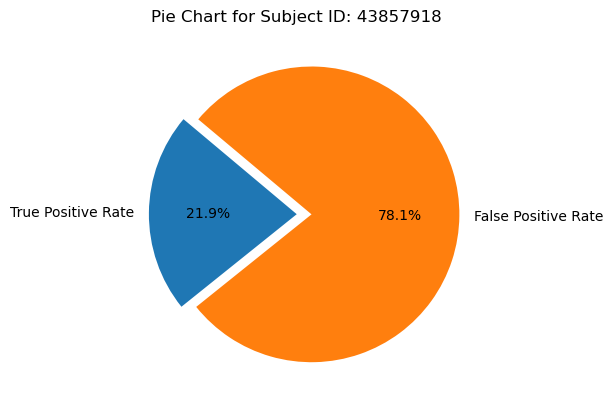

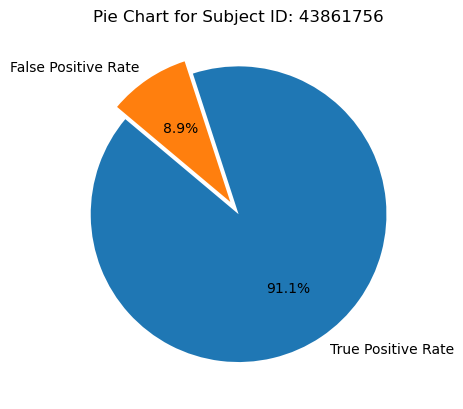

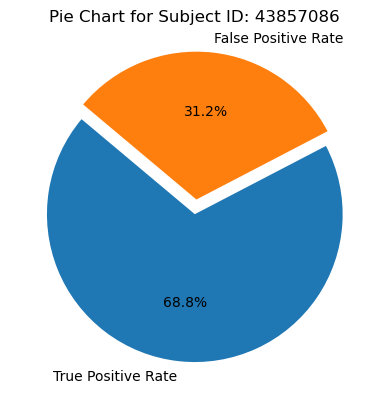

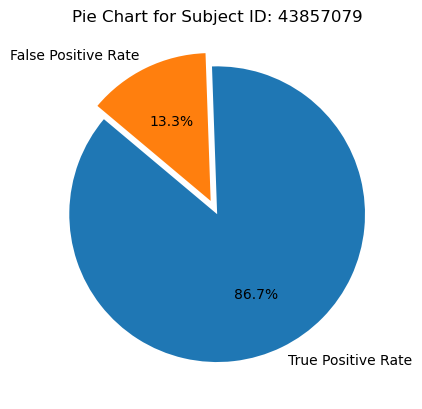

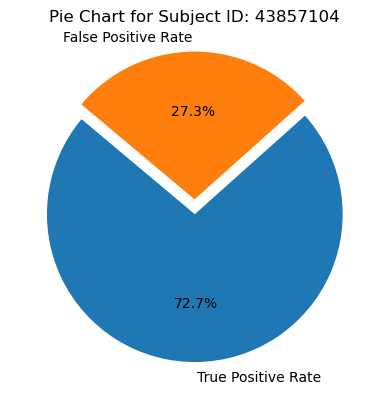

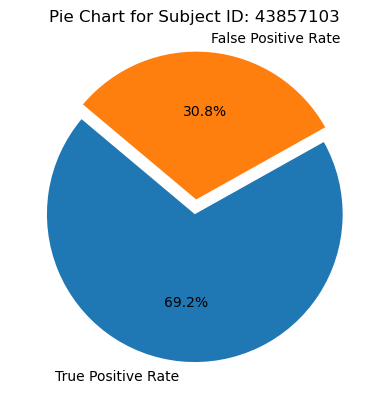

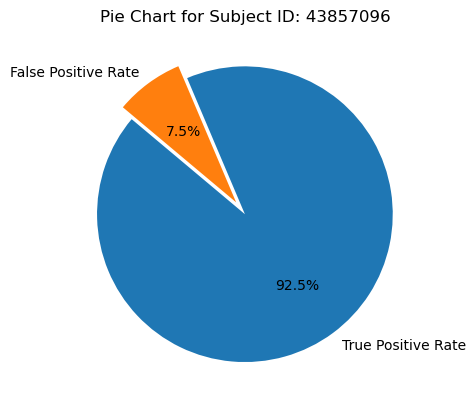

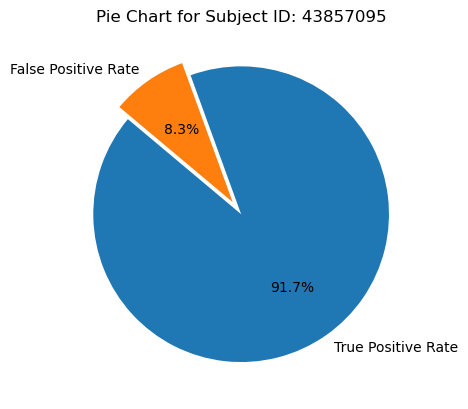

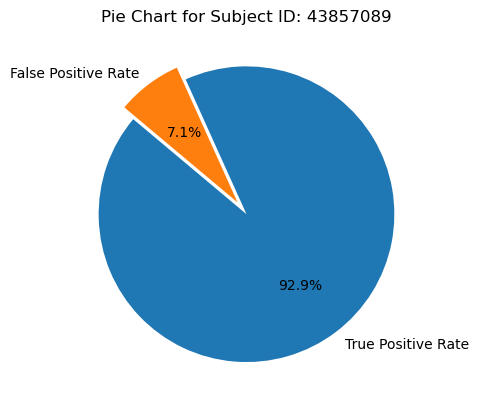

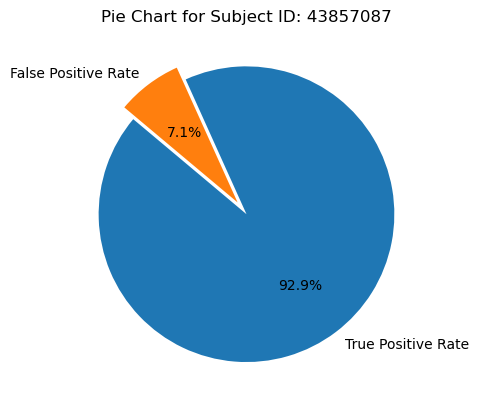

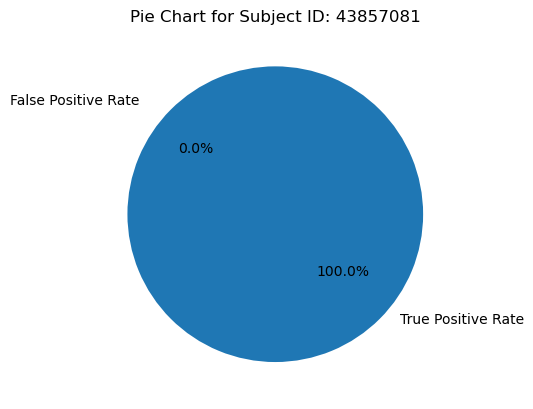

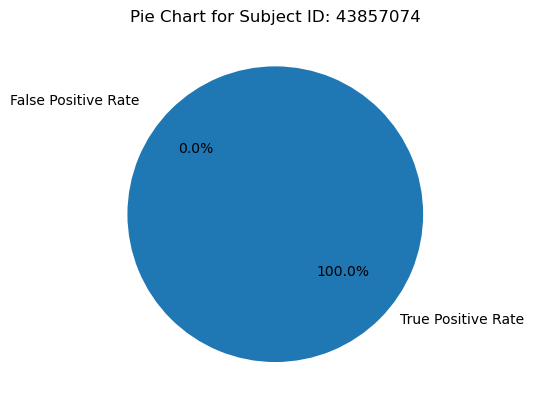

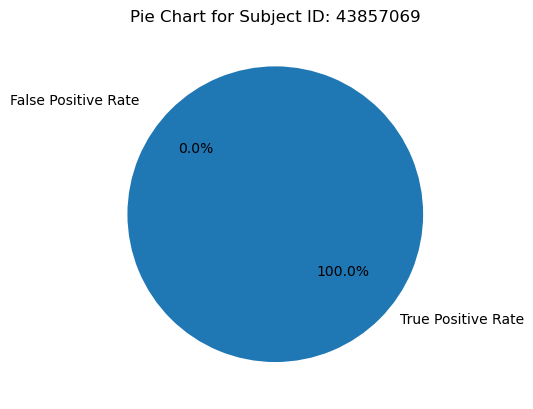

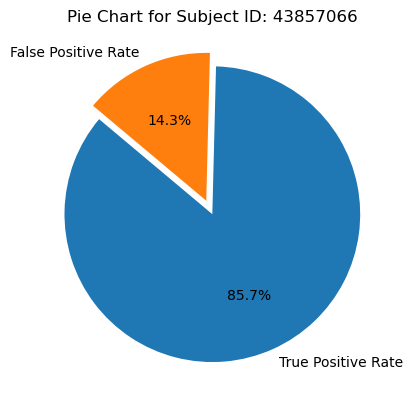

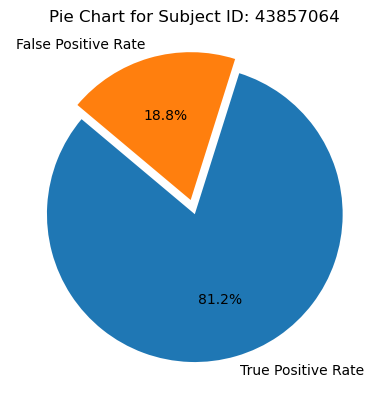

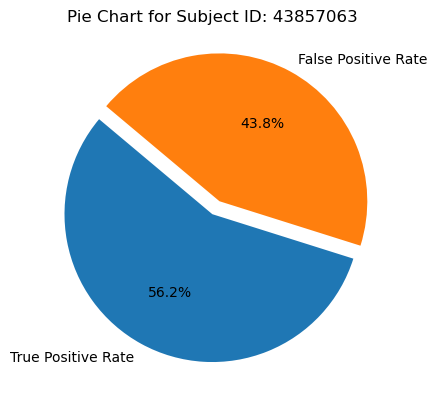

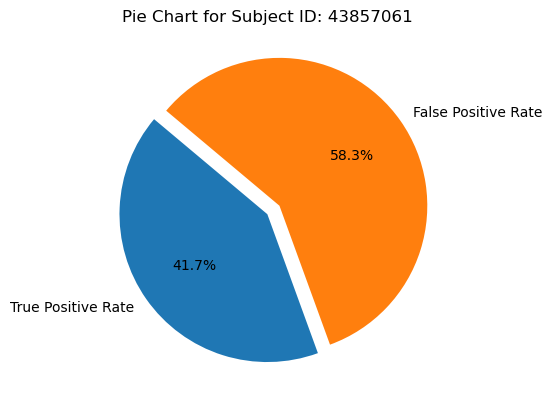

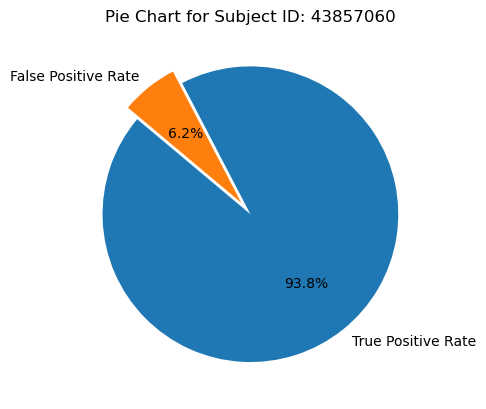

In [53]:
import matplotlib.pyplot as plt

# Function to create pie chart for a specific subject_id
def create_pie_chart(subject_id):
    subject_data = merged_df_unique_filtered[merged_df_unique_filtered['subject_id'] == subject_id]
    labels = ['True Positive Rate', 'False Positive Rate']
    sizes = [subject_data['true_positive_rate'].iloc[0], subject_data['false_positive_rate'].iloc[0]]
    explode = (0, 0.1) 

    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'Pie Chart for Subject ID: {subject_id}')
    plt.show()

# Loop through unique subject_ids and create pie charts
for subject_id in merged_df_unique_filtered['subject_id'].unique():
    create_pie_chart(subject_id)
